# 【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 
λ
 を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。

$$\lambda_i^{new} = \lambda_i+\alpha(1-\sum_{j=1}^n\lambda_i y_i y_j k(x_i,x_j))$$

ここで
$$k(x_i, x_j)=x_i^Tx_j$$
条件として、更新毎に 
$$\lambda_i>=0$$
とします。

## SVMマーチン最大化の話



$$1<=\frac{t_i(w_i^TX_i+b)}{M||w_i||}$$
となり、等号が成立し、なおかつ
$$\tilde{w}=\frac{w}{M||w||}$$
$$\tilde{b}=\frac{b}{M||w||}$$
とおくのであれば
$$1=t_i(\tilde{w_i^T}X_i+\tilde{b})$$
が成立する。  
この式を
$$maxM : M<=\frac{t_i(w_i^TX_i+b)}{||w_i||}$$に代入すると
$$maxM : M=\frac{1}{||w||}$$が得られる。
最大化問題を最小化問題に変更し、なおかつ唯一解をもつ形に変更すると
$$minM : M=\frac{1}{2}||w||^2$$
が得られる。  
過程が違うだけで、やることは線形回帰と同じ。

## この式をラグランジュ関数に置き換える
$$L(w, \lambda) = \frac{1}{2}||w||^2-\sum_{i=1}^n \lambda_i(y_i(w^T x_i)-1)$$
これを解いて求まる解は元式を最小化する。この式を解くと
$$w = \sum_{i_1}^n \lambda_i y_i x_i$$
が求められて代入すると
$$L(\lambda_i) = \sum_{j=1}^n\lambda_i - \sum_{i=1}^n\sum_{j=1}^n\lambda_i \lambda_j y_i y_j k(x_i,x_j)$$
がもとまる。
ここで
$$\lambda = (\lambda_i, \lambda_j)$$
のベクトルの大きさ？内積としているはず

## 最急降下法に代入
そもそも上の式がどう出てきてるのか調べてみる。  
最急降下法の式としては
$$\theta^{new} = \theta-\alpha\frac{d (目的関数)}{d\theta}$$
$\sum$の中身は求めたい物の微分になる  
もともとラグランジュの未定乗数法の求め方としては
$$L(\lambda_i) = \sum_{j=1}^n\lambda_i - \sum_{i=1}^n\sum_{j=1}^n\lambda_i \lambda_j y_i y_j k(x_i,x_j)$$
この式を
$\lambda_i$で微分すると
$$\frac{d L(\lambda_i)}{d\lambda_i} = 1 - \sum_{j=1}^n\lambda_j y_i y_j k(x_i,x_j)$$
の式が得られる。  
これを最急降下法の式に代入したものが
$$\lambda_i^{new} = \lambda_i-\alpha(1-\sum_{j=1}^n\lambda_i y_i y_j k(x_i,x_j))$$
になる。
そもそもこの式は
$$L(\lambda_i) = \sum_{j=1}^n\lambda_i - \sum_{i=1}^n\sum_{j=1}^n\lambda_i \lambda_j y_i y_j k(x_i,x_j)$$
を$\lambda_i$で最小化する時の$\lambda_i$を求める式になるが、そもそも求めたかったのは
上の式をを最小化する$\lambda_i, \lambda_j$だったはず。

ただよくわからんが、この問題は$\lambda_i$を最大化する問題に書き換えることができる。（説明は省略）  
そのため、降っていくイメージではなく登っていくイメージに変わるので
$$\lambda_i^{new} = \lambda_i+\alpha(1-\sum_{j=1}^n\lambda_i y_i y_j k(x_i,x_j))$$
の式を解くことと同義となる。  
$$\lambda_i^{new} = \lambda_i+\alpha(1-\sum_{j=1}^n\lambda_j y_i y_j k(x_i,x_j))$$を整理すると
$$\lambda_i^{new} = \lambda_i+\alpha(1-(y_i*x_i\sum_{j=1}^n\lambda_j y_j x_j))$$



$$\sum_{j=1}^n\lambda_j y_j x_j$$の意味がそこまで理解できてないのだけれど全ての値の合計値(スカラー値)になるはず？  
つまりndarray.sum()で求めてしまって良い？

In [1]:
# 最大化する関数(勾配降下の逆)
def _gradient_descent(X, y, lag, lr=0.1):
    """
    傾きを計算する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
    目的データ
    lag : 次の形のndarray, shape(n_samples, 1)
    ラグランジュ乗数
    lr : float
    学習率
    Returns
    -------
    次の形のndarray, shape (n_samples, 1)
    更新後のtheta
    """
    
    sigma = (lag * y * X).sum(axis=0)
    lag = lag + lr * (1 - ((y * X) @ sigma).reshape((X.shape[0], 1)))
    
    for i in range(lag.shape[0]):
        if lag[i] < 0:
            lag[i] = 0
        
                 
    # sigma = 1 * n_features
    # y * X = n_sample * n_futures
    
    return lag

# 【問題2】サポートベクターの決定
計算したラグランジュ乗数 $\lambda$ が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。


閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

In [2]:
def get_SV(lag, C=1e-5):
    """
    サポートベクターの数及びサポートベクターを取得する
    parameters
    ----------------------
    lag : 次の形のndarray, shape(n_samples, 1)
    ラグランジュ乗数
    C : float
    サポートベクターの閾値
    
    returns
    ----------------------
    count_sv : int
    サポートベクターの数
    SV_list : list
    サポートベクターのリスト
    """
    
    
    SV_list = []
    count_sv = (lag > C).sum()
    for i in range(lag.shape[0]):
        if lag[i] > C:
            SV_list.append(X[i])
            
    return count_sv, SV_list

# 【問題3】推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた 
f
(
x
)
 の符号が分類結果です。

# 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [3]:
import numpy as np

class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.SV_X_ndarray : 次の形のndarray, shape(n_samples, n_feature)
     サポートベクターの特徴量
    self.SV_y_ndarray : 次の形のndarray, shape(n_samples, 1)
     サポートベクターのラベル
    self.SV_　lag_ndarray : 次の形のndarray, shape(n_samples, 1)
     サポートベクターのラグランジュ乗数
    """
    
    
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        
        
        # 最大化する関数(勾配降下の逆)
    def _gradient_descent(self, X, y, lag):
        """
        ラグランジュ関数の最大化を行う
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        y : 次の形のndarray, shape (n_samples, 1)
        目的データ
        lag : 次の形のndarray, shape(n_samples, 1)
        ラグランジュ乗数
        lr : float
        学習率
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        更新後のラグランジュ関数
        """
        
        sigma = (lag * y * X).sum(axis=0)
        lag = lag + self.lr * (1 - ((y * X) @ sigma).reshape((X.shape[0], 1)))
        
        for i in range(lag.shape[0]):
            if lag[i] < 0:
                lag[i] = 0
        # sigma = 1 * n_features
        # y * X = n_sample * n_futures

        return lag

    
    def get_SV(self, X, y, lag):
        """
        サポートベクターの数及びサポートベクターを取得する
        parameters
        ----------------------
        lag : 次の形のndarray, shape(n_samples, 1)
        ラグランジュ乗数
        C : float
        サポートベクターの閾値

        returns
        ----------------------
        SV_X_ndarray : 次の形のndarray, shape(n_samples, n_feature)
        サポートベクターの特徴量
        SV_y_ndarray : 次の形のndarray, shape(n_samples, 1)
        サポートベクターのラベル
        SV_　lag_ndarray : 次の形のndarray, shape(n_samples, 1)
        サポートベクターのラグランジュ乗数
        """
        index_list = []
        count = 0
        # 閾値より高いラグランジュ乗数の個数
        count_sv = (lag > self.threshold).sum()
        
        SV_X_ndarray = np.zeros((count_sv, X.shape[1]))
        SV_y_ndarray = np.zeros((count_sv, 1))
        SV_lag_ndarray = np.zeros((count_sv, 1))
        
        for i in range(lag.shape[0]):
            
            if lag[i] > self.threshold:
                
                # index番号を保存
                index_list.append(i)
                
                # 閾値より高いサポートベクターのパラメータを保存
                SV_X_ndarray[count] = X[i]
                SV_y_ndarray[count] = y[i]
                SV_lag_ndarray[count] = lag[i]
                count += 1

        # 使わないのでインスタンス化
        self.n_support_vectors = count_sv
        self.index_support_vectors  = index_list
        
        return SV_X_ndarray, SV_y_ndarray, SV_lag_ndarray
        
  
    def fit(self, X, y):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        
        # 初期値の設定
        lag = np.zeros((X.shape[0], 1))
        lag_history = np.zeros((self.iter, X.shape[0]))
        
        # yの設定
        y = y.reshape((y.shape[0], 1))
        
        # 学習
        for n in range(self.iter):
            lag = self._gradient_descent(X, y, lag)
            lag_history[n] = lag.T
            
        # SVの決定
        self.SV_X_ndarray, self.SV_y_ndarray, self.SV_lag_ndarray = self.get_SV(X, y, lag)
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(lag_history)
        
        
    def predict(self, test_X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
    
        f = np.zeros((test_X.shape[0], 1))

        # テストデータ分推定の実行
        for n in range(test_X.shape[0]):
            f[n] = (self.SV_y_ndarray * self.SV_lag_ndarray * (self.SV_X_ndarray @ test_X[n:n+1].T)).sum()

            if f[n] > 0:
                f[n] = 1
            else:
                f[n] = -1

        return f

## データの読み込み

In [4]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

In [5]:
from sklearn.preprocessing import StandardScaler
sclear = StandardScaler()
X = sclear.fit_transform(X)

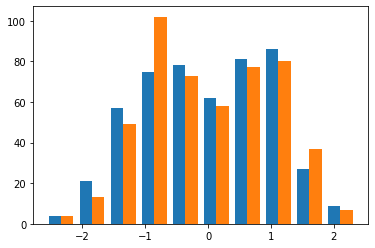

In [6]:
import matplotlib.pyplot as plt
plt.hist(X);

In [7]:
from sklearn.model_selection import train_test_split
X_75, X_25 = train_test_split(X, random_state=0)
y_75, y_25 = train_test_split(y, random_state=0)

## 公式モデルでの実行

In [8]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_75, y_75)
svc_pred = svc.predict(X_25)

from sklearn.metrics import classification_report
print(classification_report(y_25, svc_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        62

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='x1', ylabel='x2', target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    a = np.min(X[:,0])-0.5 # Sepallabelの最小値-0.5
    b = np.max(X[:,0])+0.5 # Sepallabelの最大値+0.5
    c = np.min(X[:,1])-0.5 # Petallabelの最小値-0.5
    d = np.max(X[:,1])+0.5 # Petallabelの最小値+0.5
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(a, b, step), np.arange(c, d, step))
    
    e = np.ravel(mesh_f0) #列が全部指定したもの
    f = np.ravel(mesh_f1) #行が全部指定したもの
    
    mesh = np.c_[e,f] # グラフ領域(2次元)に左上から00.01-といった形で数字をつけた
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color)) # 等高線の間の色付
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)# 等高線の描画
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o') # 散布図の作成
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)] # よくわからんけど凡例の書き方を入れてる
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

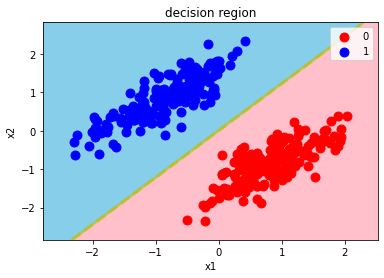

In [10]:
decision_region(X_75, y_75, svc)

## 自作モデルでの実行

In [11]:
my_svc = ScratchSVMClassifier(num_iter=100, lr=0.008)
my_svc.fit(X_75, y_75)


In [13]:
my_svc.n_support_vectors

8

In [14]:
print(classification_report(y_25, my_svc.predict(X_25)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        62

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



公式モデルと変わらない出来栄えで分別ができた。

# 【問題5】決定領域の可視化
決定領域を可視化してください。


以下の例のようにサポートベクターは異なる色で示してください。

In [16]:
def decision_region_2(X, y, SV_index_list, model, step=0.01, title='decision region', xlabel='x1', ylabel='x2', target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    a = np.min(X[:,0])-0.5 # Sepallabelの最小値-0.5
    b = np.max(X[:,0])+0.5 # Sepallabelの最大値+0.5
    c = np.min(X[:,1])-0.5 # Petallabelの最小値-0.5
    d = np.max(X[:,1])+0.5 # Petallabelの最小値+0.5
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(a, b, step), np.arange(c, d, step))
    
    e = np.ravel(mesh_f0) #列が全部指定したもの
    f = np.ravel(mesh_f1) #行が全部指定したもの
    
    mesh = np.c_[e,f] # グラフ領域(2次元)に左上から00.01-といった形で数字をつけた
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color)) # 等高線の間の色付
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)# 等高線の描画
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o') # 散布図の作成
    for i in (SV_index_list):
        plt.scatter(X[i, 0], X[i, 1], color='g', s=100)
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)] # よくわからんけど凡例の書き方を入れてる
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [18]:
my_svc.index_support_vectors

[27, 44, 60, 181, 192, 278, 290, 363]

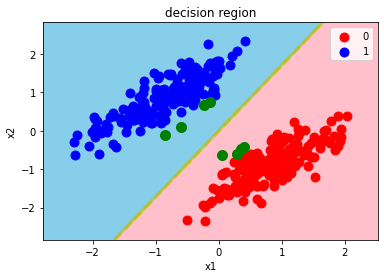

In [19]:
decision_region_2(X_75, y_75, my_svc.index_support_vectors, my_svc)